In [36]:
! pip install numpy pandas seaborn matplotlib scikit-learn

In [37]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [38]:
x = np.random.rand(5,2,4)

In [39]:
x

array([[[0.91487752, 0.30391899, 0.93320645, 0.59251494],
        [0.50342982, 0.07207686, 0.07262057, 0.94969139]],

       [[0.85021374, 0.06094823, 0.48200198, 0.44383514],
        [0.37164057, 0.92321792, 0.17357451, 0.23402106]],

       [[0.80331034, 0.43166688, 0.72323243, 0.94931745],
        [0.73157796, 0.49960257, 0.81692419, 0.27686135]],

       [[0.90822249, 0.13729405, 0.04412703, 0.04206791],
        [0.94383187, 0.71740605, 0.00273796, 0.60313462]],

       [[0.54408101, 0.68598046, 0.80240566, 0.03047742],
        [0.56229471, 0.41371166, 0.43060471, 0.38268991]]])

In [40]:
data = pd.read_csv("C:/Users/sainithin/Downloads/Telegram Desktop/Crop_recommendation.csv")

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [42]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


<Axes: xlabel='label', ylabel='count'>

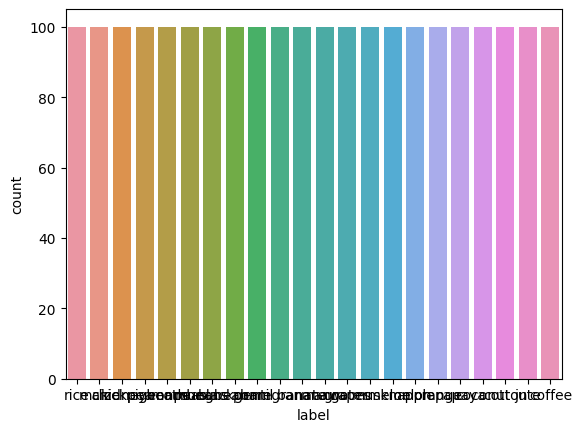

In [43]:
sns.countplot(x='label', data=data)

In [44]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x= data.drop(['label','rainfall'], axis = 1)
y= data['label']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 0)
clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

# print(clf.predict(np.array([data.iloc[1367,0:7]]))[0])
print(clf.predict(np.array([x_test.iloc[77,:]]))[0])
y_pred = clf.predict(x_test)
# print(classification_report(y_test,y_pred))

maize
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       0.88      0.81      0.84        26
    chickpea       1.00      1.00      1.00        28
     coconut       0.95      0.95      0.95        19
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        24
        jute       0.90      0.68      0.78        28
 kidneybeans       1.00      1.00      1.00        23
      lentil       0.56      0.82      0.67        17
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        24
   mothbeans       0.87      0.90      0.88        29
    mungbean       1.00      1.00      1.00        27
   muskmelon       0.96      0.93      0.94        27
      orange       1.00      1.00      1.00        27
      papaya       1.

c:\Users\sainithin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [72]:
from sklearn.cluster import KMeans

clt = KMeans(n_clusters=22)

clt.fit(x_train, y_train)

c:\Users\sainithin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=22)

In [74]:
yhat = clt.predict(x_train)


In [75]:
from numpy import unique
unique(yhat)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [66]:
print(clt.predict(np.array([[1,80,19, 24.6764, 75.4565,7.77]]))[0])

15


c:\Users\sainithin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [48]:
x_train.shape

(1650, 6)

In [49]:
def dis_test(element):
    print(x_test.iloc[element,:])
    print(y_test.iloc[element])

dis_test(77)

N              74.000000
P              43.000000
K              23.000000
temperature    25.952633
humidity       61.890822
ph              6.325235
Name: 148, dtype: float64
maize


In [50]:
def dis(element):
    print(data.iloc[element,0:7])
    print(data.iloc[element,7])

dis(104)


N                     61
P                     38
K                     20
temperature    18.478913
humidity       62.695039
ph              5.970458
rainfall       65.438354
Name: 104, dtype: object
maize


In [51]:
y_test.iloc[1]

'watermelon'

In [52]:
x_test.iloc[44,:]

N              17.000000
P              67.000000
K              18.000000
temperature    31.219275
humidity       56.468689
ph              5.611511
Name: 452, dtype: float64

In [53]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [54]:
import pickle

model_pik = 'NPK.pkl'

with open(model_pik, 'wb') as file:
    pickle.dump(clf, file)

In [55]:
import pickle
import numpy as np

with open('NPK.pkl', 'rb') as file:
    imp_model = pickle.load(file)

print(imp_model.predict(np.array([[15,80,19, 24.6764, 75.4565,7.77]]))[0])

lentil


c:\Users\sainithin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
